In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ridership_data = pd.read_csv('Ridership Model Data.csv')
ridership_data.head()

,ISOYear,Month,ISOWeek,Total Boardings,Start of Week,Revenue Hours,Restaurant Bookings,Gas Price (C/L),University School Season,Employment,WFH,Population Growth Rate,BC Vaccination Rate,hospitalizations,critical cases
0,2019,1,1,337533.0,43465.0,12526.5,0.0,135.0,3.0,2651.0,2.1,0.02,1.0,0.0,0.0
1,2019,1,2,673937.0,43472.0,12526.5,0.0,133.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0
2,2019,1,3,676048.0,43479.0,12526.5,0.0,132.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0
3,2019,1,4,668159.0,43486.0,12526.5,0.0,130.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0
4,2019,1,5,666372.0,43493.0,12526.5,0.0,126.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0


In [ ]:
c1 = pd.DataFrame(ridership_data.drop(['Month','ISOWeek','Start of Week','Population Growth Rate'],axis=1).corr()['Total Boardings'])
c2 = pd.DataFrame(ridership_data[ridership_data['hospitalizations']>0].drop(['Month','ISOWeek','Start of Week','Population Growth Rate'],axis=1).corr()['Total Boardings'])
c3 = pd.DataFrame(ridership_data[ridership_data['hospitalizations']==0].drop(['Month','ISOWeek','Start of Week','Population Growth Rate'],axis=1).corr()['Total Boardings'])

In [ ]:
correlations = pd.concat([c1, c2, c3], axis=1)
correlations.columns = ['Overall', 'Post-Covid', 'Pre-Covid']

<Figure size 864x576 with 0 Axes>

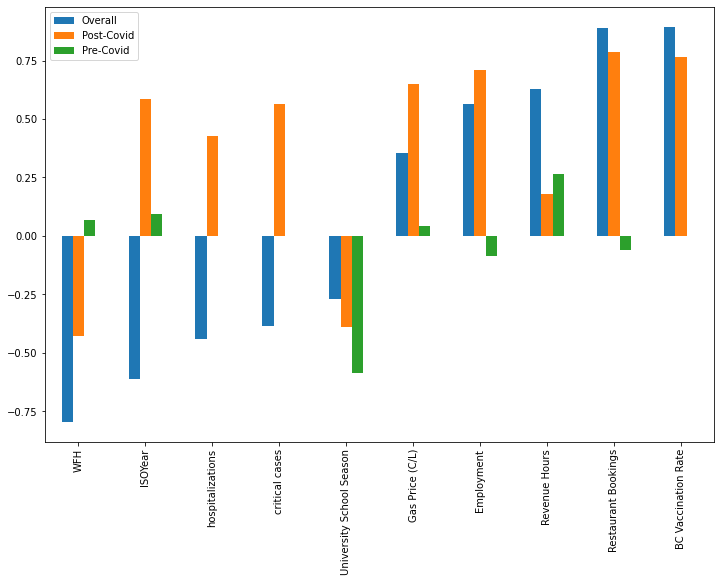

In [ ]:
plt.figure(figsize=(12,8))
correlations.drop('Total Boardings').sort_values(by='Overall').plot(kind='bar',figsize=(12,8))

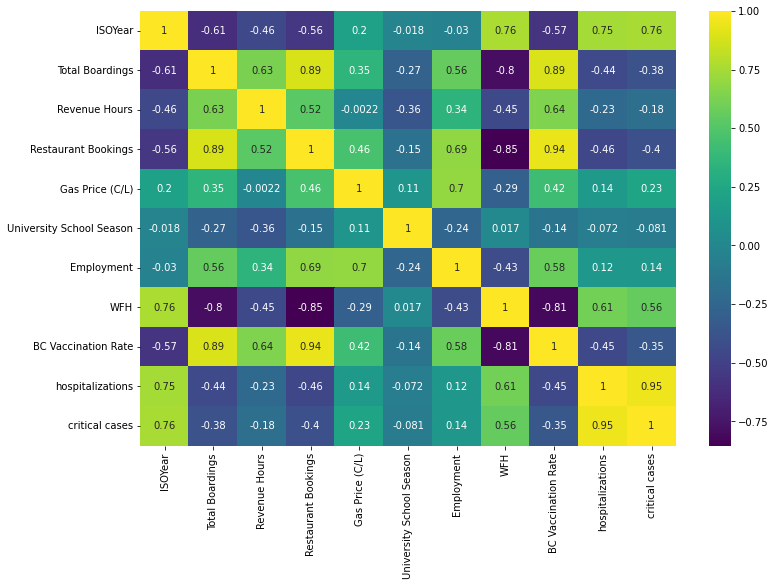

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data=ridership_data.corr(),cmap='viridis',annot=True)

In [ ]:
ridership_data = ridership_data.drop(['critical cases','BC Vaccination Rate'], axis=1)

In [ ]:
ridership_data.columns

Index(['Total Boardings', 'Revenue Hours', 'Restaurant Bookings',
       'Gas Price (C/L)', 'University School Season', 'Employment', 'WFH',
       'hospitalizations'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Weekly Boardings')

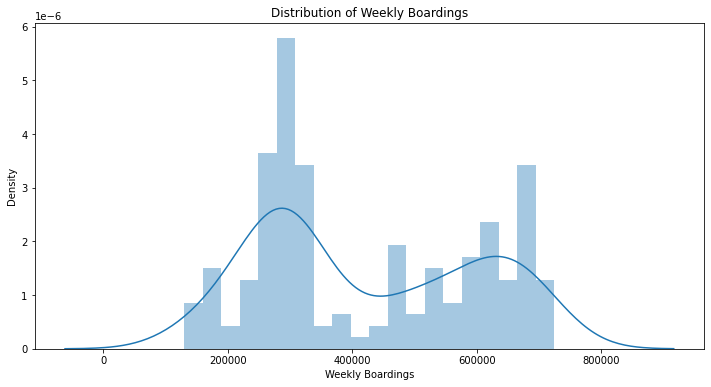

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=ridership_data['Total Boardings'],bins=20)
plt.title('Distribution of Weekly Boardings')
plt.xlabel('Weekly Boardings')

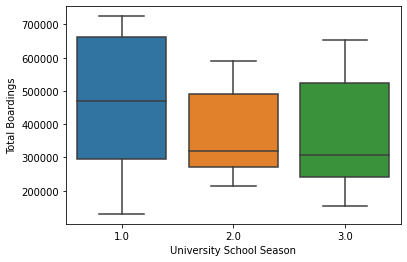

In [ ]:
sns.boxplot(data=ridership_data,x='University School Season',y='Total Boardings')

In [ ]:
X = ridership_data.drop('Total Boardings', axis=1).values
y = ridership_data['Total Boardings'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15,random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train.shape

(133, 8)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=1,epochs=300,
          callbacks=[early_stop])

Epoch 1/300
133/133 [==============================] - 1s 3ms/step - loss: 211854311424.0000 - val_loss: 202074144768.0000
Epoch 2/300
133/133 [==============================] - 0s 2ms/step - loss: 211853967360.0000 - val_loss: 202073653248.0000
Epoch 3/300
133/133 [==============================] - 0s 2ms/step - loss: 211852820480.0000 - val_loss: 202071392256.0000
Epoch 4/300
133/133 [==============================] - 0s 2ms/step - loss: 211846529024.0000 - val_loss: 202058956800.0000
Epoch 5/300
133/133 [==============================] - 0s 2ms/step - loss: 211821166592.0000 - val_loss: 202016620544.0000
Epoch 6/300
133/133 [==============================] - 0s 2ms/step - loss: 211751174144.0000 - val_loss: 201915498496.0000
Epoch 7/300
133/133 [==============================] - 0s 2ms/step - loss: 211607453696.0000 - val_loss: 201727803392.0000
Epoch 8/300
133/133 [==============================] - 0s 2ms/step - loss: 211367149568.0000 - val_loss: 201431072768.0000
Epoch 9/300
133/

In [ ]:
losses = pd.DataFrame(model.history.history)

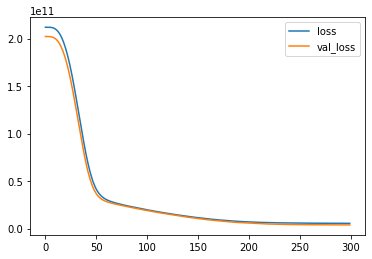

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, predictions) / ridership_data['Total Boardings'].mean()

0.12723093841787234

In [ ]:
explained_variance_score(y_test,predictions)

0.8766807904437046

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions)) / ridership_data['Total Boardings'].mean()

0.148188428106904

Text(0, 0.5, 'Predicted Values')

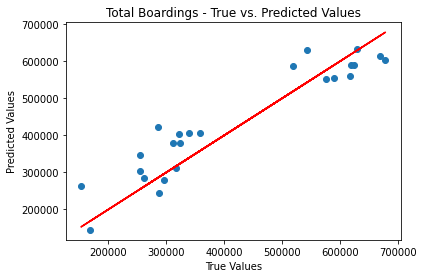

In [ ]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r-')
plt.title('Total Boardings - True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')